In [ ]:
using Plots, Plots.Measures
using DataFrames
using CSV
using Test
using StatsBase
using LatexPrint

In [284]:
df15 = CSV.read("test/uniform_dirichlet_percs_std125_t15.csv", DataFrame);

In [285]:
df = CSV.read("test/uniform_dirichlet_percs_std125_t20.csv", DataFrame);

In [294]:
# BP,VMP,ORIG,hamming_vmp,hamming_bp,hamming_orgin,hamming_naive
# \text{BP},\text{VMP},\text{ORIG},\text{hamming_vmp},\text{hamming_bp},\text{hamming_orgin},\text{hamming_naive}
# rename!(df,[])

In [295]:
df |> describe, df15 |> describe

(7×7 DataFrame
 Row │ variable       mean      min       median    max        nmissing  eltyp ⋯
     │ Symbol         Float64   Real      Float64   Real       Int64     DataT ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ BP             0.999973  0.999545  0.999996   1.0              0  Float ⋯
   2 │ VMP            0.999865  0.997012  0.999989   1.0              0  Float
   3 │ ORIG           0.92382   0.486471  0.961542   0.999801         0  Float
   4 │ hamming_vmp    2.1       0         2.0        7                0  Int64
   5 │ hamming_bp     1.74      0         2.0        5                0  Int64 ⋯
   6 │ hamming_orgin  6.96      3         7.0       14                0  Int64
   7 │ hamming_naive  3.06      0         3.0        8                0  Int64
                                                                1 column omitted, 7×7 DataFrame
 Row │ variable       mean      min        median    max        nmissing  elty ⋯
     │ S

In [336]:
function get_latex(df)
    rounded_df = df |> describe |> x -> x[:, ["variable","mean","min","max"]] .|> x -> typeof(x) <: Real ? round(x, digits=5) : x
    Matrix(rounded_df) |> latex_form
end
ss = get_latex(df)
old = ["BP","VMP","ORIG","hamming_vmp","hamming_bp","hamming_orgin","hamming_naive"]
new = ["\\text{BP}","\\text{VMP}","\\text{ORIG}","\\text{H vmp}","\\text{H bp}","\\text{H orig}","\\text{H naive}"]
for i in 1:length(old)
    ss = replace(ss::AbstractString, old[i]=>new[i])
end
println(ss)

\left[
\begin{array}{cccc}
\text{BP} & 0.99997 & 0.99955 & 1.0 \\
\text{VMP} & 0.99986 & 0.99701 & 1.0 \\
\text{ORIG} & 0.92382 & 0.48647 & 0.9998 \\
\text{H vmp} & 2.1 & 0.0 & 7.0 \\
\text{H bp} & 1.74 & 0.0 & 5.0 \\
\text{H orig} & 6.96 & 3.0 & 14.0 \\
\text{H naive} & 3.06 & 0.0 & 8.0 \\
\end{array}
\right]


In [337]:
function get_latex(df)
    rounded_df = df |> describe |> x -> x[:, ["variable","mean","min","max"]] .|> x -> typeof(x) <: Real ? round(x, digits=5) : x
    Matrix(rounded_df) |> latex_form
end
ss = get_latex(df15)
for i in 1:length(old)
    ss = replace(ss::AbstractString, old[i]=>new[i])
end
println(ss)

\left[
\begin{array}{cccc}
\text{BP} & 0.9995 & 0.99194 & 1.0 \\
\text{VMP} & 0.9986 & 0.97464 & 1.0 \\
\text{ORIG} & 0.8851 & 0.08997 & 0.99991 \\
\text{H vmp} & 1.63 & 0.0 & 7.0 \\
\text{H bp} & 1.61 & 0.0 & 7.0 \\
\text{H orig} & 5.22 & 1.0 & 12.0 \\
\text{H naive} & 2.68 & 0.0 & 8.0 \\
\end{array}
\right]


In [ ]:
freplace(get_latex(df))

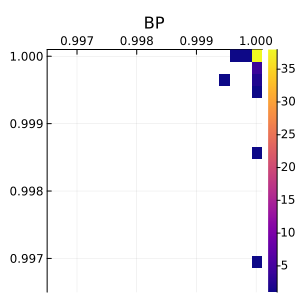

In [305]:
@test sum(df.BP .< 0.9965) == 0 && sum(df.VMP .< 0.9965) == 0
histogram2d(df.BP, df.VMP, bins=(range(0.9965, 1.0001,length=21),range(0.9965, 1.0001, length=21)), color=:plasma, xlabel = "BP" ,xguideposition = :top, yguideposition = :left, xmirror = true)
# xlabel!("BP")
# ylabel!("VMP")
plot!(size=(300,300),margin=0cm)
# savefig("uniform_dirichlet_percs_std125_t20.png")

In [231]:
df[df.BP .> df.VMP,:] |> size |> first, df[df.BP .< df.VMP,:] |> size |> first

(25, 16)

In [267]:
@test sum(df15.BP .< 0.974) == 0 && sum(df15.VMP .< 0.974) == 0
histogram2d(df15.BP, df15.VMP, bins=(range(0.974, 1.0001,length=21),range(0.974, 1.0001, length=21)), color=:plasma, xlabel = "BP", ylabel="VMP",xguideposition = :top, yguideposition = :left, xmirror = true)
# xlabel!("BP")
# ylabel!("VMP")
plot!(size=(300,300))
savefig("uniform_dirichlet_percs_std125_t15.png")

"/Users/erik/.julia/dev/VBMC/uniform_dirichlet_percs_std125_t15.png"